In [2]:
import pandas as pd
from os import path
import json

In [3]:
DATA_DIR = "../../data"

In [4]:
seeds = [4, 18, 27, 36, 42]

In [5]:
split_results = {}
for seed in seeds:
    results_a = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_a", 
        "all.csv"
    ), sep="\t", header=None)
    results_b = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_b", 
        "all.csv"
    ), sep="\t", header=None)
    results_a.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    results_b.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC"]
    
    split_results[str(seed) + "a"] = results_a    
    split_results[str(seed) + "b"] = results_b

In [6]:
split_results["4a"].groupby("model_name")[["F1", "MCC", "Acc", "Precision", "Recall", "AUC"]].mean()

,F1,MCC,Acc,Precision,Recall,AUC
model_name,,,,,,
SVM,0.451640,0.241844,0.641409,0.362005,0.628656,0.637059
gradient_boosting,0.159034,0.124523,0.761396,0.482103,0.099351,0.531952
kNN,0.325162,0.149629,0.713014,0.367883,0.297008,0.568834
logistic_regression,0.453582,0.254362,0.671467,0.381555,0.583513,0.641162
multilayer_perceptron,0.351993,0.231120,0.761625,0.471699,0.286617,0.596980
random_forest,0.364109,0.231394,0.733142,0.474083,0.381978,0.611325


In [7]:
df_list = [value for key, value in split_results.items()]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)

In [8]:
df_concat

,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
0,kNN,integer_encoded,scaling,0.259740,0.132707,0.738532,0.389610,0.194805,0.550403
1,logistic_regression,integer_encoded,scaling,0.306785,0.067509,0.640673,0.281081,0.337662,0.535831
2,random_forest,integer_encoded,scaling,0.305455,0.125359,0.707951,0.347107,0.272727,0.557364
3,kNN,pybiomed,scaling,0.403974,0.225214,0.724771,0.412162,0.396104,0.611052
4,logistic_regression,pybiomed,scaling,0.458824,0.273214,0.718654,0.419355,0.506494,0.645247
...,...,...,...,...,...,...,...,...,...
37,logistic_regression,onehot,scaling,0.427673,0.237526,0.712025,0.400000,0.459459,0.624358
38,random_forest,onehot,scaling,0.444976,0.224873,0.632911,0.344444,0.628378,0.631338
39,multilayer_perceptron,onehot,scaling,0.360153,0.200262,0.735759,0.415929,0.317568,0.590602
40,SVM,onehot,scaling,0.411311,0.181260,0.637658,0.331950,0.540541,0.603948


In [9]:
grouped = df_concat.groupby(["model_name", "data"])
df_means = grouped.mean()

In [43]:
# Means across the different data splits
df_means

F1       MCC       Acc  \
model_name            data                                            
SVM                   bert             0.507515  0.362930  0.738193   
                      integer_encoded  0.337540  0.134286  0.670378   
                      onehot           0.430088  0.257971  0.720027   
                      protparam        0.303986  0.010289  0.457847   
                      pybiomed         0.440407  0.284269  0.745837   
                      sapiens          0.440024  0.267177  0.668604   
                      seqvec           0.489386  0.340335  0.674513   
gradient_boosting     bert             0.278702  0.202104  0.789875   
                      integer_encoded  0.169952  0.083143  0.768211   
                      onehot           0.223478  0.133043  0.773448   
                      protparam        0.303578  0.259314  0.806938   
                      pybiomed         0.239182  0.179683  0.791823   
                      sapiens          0.136349  0.102079  0.788166   
                      seqvec           0.209354  0.162010  0.790814   
kNN                   bert             0.353010  0.179221  0.720113   
                      integer_encoded  0.306184  0.147960  0.733124   
                      onehot           0.351777  0.173411  0.711698   
                      protparam        0.245259  0.034584  0.665917   
                      pybiomed         0.342626  0.171387  0.724376   
                      sapiens          0.278531  0.105469  0.713181   
                      seqvec           0.353629  0.173495  0.711447   
logistic_regression   bert             0.511498  0.372874  0.770851   
                      integer_encoded  0.315693  0.112783  0.674701   
                      onehot           0.445289  0.288201  0.748644   
                      protparam        0.364121  0.139984  0.592097   
                      pybiomed         0.467703  0.312537  0.742092   
                      sapiens          0.440547  0.268239  0.635459   
                      seqvec           0.510053  0.365731  0.735306   
multilayer_perceptron bert             0.464615  0.350077  0.801948   
                      integer_encoded  0.267335  0.135543  0.753369   
                      onehot           0.386076  0.259224  0.776552   
                      protparam        0.092959  0.016778  0.742383   
                      pybiomed         0.261821  0.205889  0.774164   
                      sapiens          0.281713  0.172617  0.765431   
                      seqvec           0.449182  0.324202  0.789333   
random_forest         bert             0.445334  0.316399  0.786602   
                      integer_encoded  0.349876  0.161722  0.696222   
                      onehot           0.421371  0.243352  0.703104   
                      protparam        0.461603  0.306881  0.744443   
                      pybiomed         0.207997  0.215087  0.805823   
                      sapiens          0.282824  0.189426  0.785031   
                      seqvec           0.465558  0.314144  0.756662   

                                       Precision    Recall       AUC  
model_name            data                                            
SVM                   bert              0.412027  0.667665  0.711918  
                      integer_encoded   0.288012  0.415756  0.576004  
                      onehot            0.371060  0.516170  0.643586  
                      protparam         0.205467  0.588839  0.505794  
                      pybiomed          0.400889  0.497485  0.653914  
                      sapiens           0.331980  0.655419  0.662689  
                      seqvec            0.358976  0.770563  0.709496  
gradient_boosting     bert              0.465092  0.203915  0.572146  
                      integer_encoded   0.319881  0.122160  0.528328  
                      onehot            0.380048  0.163042  0.546774  
                      protparam         0.573935  0.210143  0.585256

In [144]:
df_means.to_csv(path.join(DATA_DIR, "evaluations/average_f1_scores.csv"))

# Model Statistics

In [49]:
df_means.groupby("model_name")[["F1", "MCC"]].mean()

,F1,MCC
model_name,,
SVM,0.421278,0.236751
gradient_boosting,0.222942,0.160197
kNN,0.318717,0.140790
logistic_regression,0.436415,0.265764
multilayer_perceptron,0.314814,0.209190
random_forest,0.376366,0.249573


In [10]:
# Best combination for each model type
idx = df_means.groupby(['model_name'])['F1'].transform(max) == df_means['F1']
df_means[idx]

,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,
SVM,bert,0.507515,0.362930,0.738193,0.412027,0.667665,0.711918
gradient_boosting,protparam,0.303578,0.259314,0.806938,0.573935,0.210143,0.585256
kNN,seqvec,0.353629,0.173495,0.711447,0.326268,0.391754,0.592755
logistic_regression,bert,0.511498,0.372874,0.770851,0.451917,0.594403,0.705310
multilayer_perceptron,bert,0.464615,0.350077,0.801948,0.517870,0.428143,0.663006
random_forest,seqvec,0.465558,0.314144,0.756662,0.419259,0.525549,0.670094


In [11]:
best_for_model = {
    row.name[0]: row.name[1] for i, row in df_means[idx].iterrows()
}

In [212]:
json.dump(best_for_model, open(path.join(DATA_DIR, "evaluations/best_by_model_configs.json"), "w"))

In [146]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_model.csv"), sep="\t")

# Data Statistics

In [12]:
df_means.groupby("data")[["F1", "MCC"]].mean()

,F1,MCC
data,,
bert,0.426779,0.297268
integer_encoded,0.291097,0.129239
onehot,0.376347,0.225867
protparam,0.295251,0.127972
pybiomed,0.326623,0.228142
sapiens,0.309998,0.184168
seqvec,0.412860,0.279986


In [13]:
# Best combination for each data representation
idx = df_means.groupby(['data'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC       Acc  Precision  \
model_name          data                                                       
logistic_regression bert             0.511498  0.372874  0.770851   0.451917   
                    onehot           0.445289  0.288201  0.748644   0.404620   
                    pybiomed         0.467703  0.312537  0.742092   0.403834   
                    sapiens          0.440547  0.268239  0.635459   0.317317   
                    seqvec           0.510053  0.365731  0.735306   0.407988   
random_forest       integer_encoded  0.349876  0.161722  0.696222   0.311070   
                    protparam        0.461603  0.306881  0.744443   0.405028   

                                       Recall       AUC  
model_name          data                                 
logistic_regression bert             0.594403  0.705310  
                    onehot           0.498170  0.655414  
                    pybiomed         0.561968  0.675210  
                    sapiens          0.721630  0.667069  
                    seqvec           0.682900  0.715542  
random_forest       integer_encoded  0.408197  0.589306  
                    protparam        0.544131  0.670257

In [14]:
best_for_data = {
    row.name[1]: row.name[0] for i, row in df_means[idx].iterrows()
}

In [15]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_data.csv"), sep="\t")

In [211]:
json.dump(best_for_data, open(path.join(DATA_DIR, "evaluations/best_by_data_configs.json"), "w"))

# Best total results

In [91]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  Precision  \
model_name            data                                                 
logistic_regression   bert       0.511498  0.372874  0.770851   0.451917   
                      seqvec     0.510053  0.365731  0.735306   0.407988   
SVM                   bert       0.507515  0.362930  0.738193   0.412027   
                      seqvec     0.489386  0.340335  0.674513   0.358976   
logistic_regression   pybiomed   0.467703  0.312537  0.742092   0.403834   
random_forest         seqvec     0.465558  0.314144  0.756662   0.419259   
multilayer_perceptron bert       0.464615  0.350077  0.801948   0.517870   
random_forest         protparam  0.461603  0.306881  0.744443   0.405028   
multilayer_perceptron seqvec     0.449182  0.324202  0.789333   0.480557   
random_forest         bert       0.445334  0.316399  0.786602   0.473515   

                                   Recall       AUC  
model_name            data                           
logistic_regression   bert       0.594403  0.705310  
                      seqvec     0.682900  0.715542  
SVM                   bert       0.667665  0.711918  
                      seqvec     0.770563  0.709496  
logistic_regression   pybiomed   0.561968  0.675210  
random_forest         seqvec     0.525549  0.670094  
multilayer_perceptron bert       0.428143  0.663006  
random_forest         protparam  0.544131  0.670257  
multilayer_perceptron seqvec     0.430603  0.655851  
random_forest         bert       0.425339  0.651842

In [207]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

# Look at maxima and minima across training splits

### Maximum for models

In [150]:
grouped = df_concat.groupby(["model_name", "data"])
df_max = grouped.max()

In [151]:
idx = df_max.groupby(['model_name'])['F1'].transform(max) == df_max['F1']
df_max[idx]

,,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,,
SVM,bert,scaling,0.576623,0.426791,0.780130,0.500000,0.720779,0.740390
gradient_boosting,protparam,scaling,0.449704,0.393225,0.854003,0.666667,0.351852,0.654187
kNN,seqvec,scaling,0.410596,0.226121,0.719870,0.402597,0.462963,0.614614
logistic_regression,seqvec,scaling,0.565321,0.411533,0.757724,0.445693,0.772727,0.748561
multilayer_perceptron,bert,scaling,0.523297,0.399296,0.826748,0.604938,0.508333,0.687300
random_forest,seqvec,scaling,0.519231,0.377423,0.800912,0.476471,0.590909,0.706253


### Minimum for models

In [152]:
grouped = df_concat.groupby(["model_name", "data"])
df_min = grouped.min()

In [153]:
idx = df_min.groupby(['model_name'])['F1'].transform(max) == df_min['F1']
df_min[idx]

,,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,,
SVM,bert,scaling,0.471591,0.327655,0.698262,0.361502,0.606557,0.687700
gradient_boosting,protparam,scaling,0.207650,0.200340,0.769352,0.500000,0.123377,0.551688
kNN,seqvec,scaling,0.324910,0.144742,0.704065,0.276074,0.344156,0.575959
logistic_regression,bert,scaling,0.480712,0.322952,0.741124,0.394444,0.535211,0.677644
multilayer_perceptron,bert,scaling,0.394737,0.292319,0.775148,0.455224,0.316901,0.619625
random_forest,protparam,scaling,0.423881,0.246689,0.714497,0.350282,0.467213,0.637900


# F test
For 1 copy of each model on data split 4a.

In [16]:
from statistics import mean
from sklearn.metrics import accuracy_score
import numpy as np
#from mlxtend.evaluate import ftest
import csv
import scipy.stats
import itertools

In [17]:
test_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/crossval/chen_4_b.csv"), index_col=0).sort_index()
test_data.head()

,Antibody_ID,heavy,light,Y,cluster
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0,677
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0,442
11,1a6u,QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLE...,AVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLFT...,0,20
12,1a6v,QVQLQQPGAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGRGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0,20
19,1ad0,EVQLLESGGGLVQPGGSLRLSCATSGFTFTDYYMNWVRQAPGKGLE...,QTVLTQSPSSLSVSVGDRVTITCRASSSVTYIHWYQQKPGLAPKSL...,0,846


In [18]:
sapiens_missing_indices = [1237, 1236, 1631, 1356, 1354, 1355, 1749, 2216, 1752]
sapiens_missing = test_data.sort_index().reset_index()[test_data.sort_index().reset_index()["index"].isin(sapiens_missing_indices)].index

In [19]:
onehot_missing_indices = [1921]
onehot_missing = test_data.sort_index().reset_index()[test_data.sort_index().reset_index()["index"] == 1921].index

In [20]:
y_preds = []
i = 0
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        for prepro in ["scaling"]:
            #print(f"{i}: {model_name}, {data_rep}")
            i += 1
            with open(path.join(DATA_DIR, f"evaluations/5x2cv/training_split_4_a/{model_name}_{data_rep}_{prepro}.csv"), "r") as f:
                reader = csv.reader(f)
                row = [int(num) for num in next(reader)]
                if data_rep == "sapiens":  # TODO !!!
                    for idx in sapiens_missing:
                        row.insert(idx, 0)
                if data_rep == "onehot":
                    row.insert(507, 0)
                y_preds.append(np.array(row))

In [21]:
print(len(y_preds))

42


In [22]:
y_true = np.array(test_data["Y"])

In [23]:
# Looney 1988
# https://www.sciencedirect.com/science/article/pii/0167865588900165
def ftest_compact(y_test, test_preds):
    n = len(y_test)
    accuracies = [accuracy_score(y_test, pred) for pred in test_preds]
    avg_acc = mean(accuracies)
    count = len(test_preds)
    m = []
    ssa = (n * sum(acc**2 for acc in accuracies)) - (n * count * avg_acc**2)
    
    for j in range(n):
        mj = sum([1 for preds in test_preds if preds[j] == y_test[j]])
        m.append(mj)
        
    ssb = (1. / count) * sum(mj ** 2 for mj in m) - (count * n * avg_acc ** 2)
    sst = count * n * avg_acc * (1 - avg_acc)
    ssab = sst - ssa - ssb
    msa = ssa / (count - 1)
    msab = ssab / ((count - 1)*(n - 1))
    f = msa / msab
    
    degrees_of_freedom_1 = count - 1
    degrees_of_freedom_2 = degrees_of_freedom_1 * n

    p_value = scipy.stats.f.sf(f, degrees_of_freedom_1, degrees_of_freedom_2)

    return f, p_value

In [24]:
f, p_value = ftest_compact(y_true, y_preds)

In [25]:
p_value

3.534669655248187e-183

In [90]:
f

24.858923968081413

# Kruskal-Wallis test
Uses F1 scores on all data splits

In [21]:
from scipy.stats import kruskal

In [138]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1_scores[f"{model_name}_{data_rep}"] = list(df_concat[(df_concat["model_name"] == model_name) & (df_concat["data"] == data_rep)]["F1"])

In [139]:
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [36]:
stat, p = kruskal(*scores)

In [37]:
p

1.4926062607669073e-51

# Friedman test

In [126]:
from scipy.stats import friedmanchisquare

In [137]:
f1_scores = []
labels = []
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1 = []
        labels.append(f"{model_name} {data_rep}")
        for seed in seeds:
            for j, letter in enumerate(["a", "b"]):
                res = split_results[str(seed) + letter]
                f1_a = res[(res["model_name"] == model_name) & (res["data"] == data_rep)]["F1"].values
                f1.append(f1_a[0])
        f1_scores.append(f1)

In [140]:
stat, p = friedmanchisquare(*f1_scores)

In [142]:
p

2.4480881874892466e-50

In [140]:
labels

['kNN_integer_encoded',
 'kNN_pybiomed',
 'kNN_protparam',
 'kNN_bert',
 'kNN_seqvec',
 'kNN_sapiens',
 'kNN_onehot',
 'logistic_regression_integer_encoded',
 'logistic_regression_pybiomed',
 'logistic_regression_protparam',
 'logistic_regression_bert',
 'logistic_regression_seqvec',
 'logistic_regression_sapiens',
 'logistic_regression_onehot',
 'random_forest_integer_encoded',
 'random_forest_pybiomed',
 'random_forest_protparam',
 'random_forest_bert',
 'random_forest_seqvec',
 'random_forest_sapiens',
 'random_forest_onehot',
 'multilayer_perceptron_integer_encoded',
 'multilayer_perceptron_pybiomed',
 'multilayer_perceptron_protparam',
 'multilayer_perceptron_bert',
 'multilayer_perceptron_seqvec',
 'multilayer_perceptron_sapiens',
 'multilayer_perceptron_onehot',
 'SVM_integer_encoded',
 'SVM_pybiomed',
 'SVM_protparam',
 'SVM_bert',
 'SVM_seqvec',
 'SVM_sapiens',
 'SVM_onehot',
 'gradient_boosting_integer_encoded',
 'gradient_boosting_pybiomed',
 'gradient_boosting_protparam',
 

In [69]:
nice_labels = {
    "integer_encoded": "Integer encoded",
    "onehot" : "One-hot",
    "pybiomed": "PyBioMed",
    "protparam": "ProtParam",
    "bert": "BERT",
    "seqvec": "SeqVec",
    "sapiens": "Sapiens",
    "kNN": "k-NN",
    "logistic_regression": "Logistic regression",
    "random_forest": "Random forest",
    "gradient_boosting": "Gradient boosting",
    "SVM": "SVM",
    "multilayer_perceptron": "Multilayer perceptron"
}

In [70]:
def get_readable_label(row):
    return nice_labels[row["model_name"]] + " + " + nice_labels[row["data"]]

In [71]:
f1_df["label"] = f1_df.apply(get_readable_label, axis=1)

In [105]:
ORDER = ['k-NN + Integer encoded', 'k-NN + One-hot', 'k-NN + PyBioMed', 'k-NN + ProtParam',
 'k-NN + BERT', 'k-NN + SeqVec', 'k-NN + Sapiens', 'Logistic regression + Integer encoded',
 'Logistic regression + One-hot', 'Logistic regression + PyBioMed', 'Logistic regression + ProtParam',
 'Logistic regression + BERT', 'Logistic regression + SeqVec', 'Logistic regression + Sapiens',
 'Random forest + Integer encoded', 'Random forest + One-hot', 'Random forest + PyBioMed',
 'Random forest + ProtParam', 'Random forest + BERT', 'Random forest + SeqVec', 'Random forest + Sapiens',
 'Gradient boosting + Integer encoded', 'Gradient boosting + One-hot', 'Gradient boosting + PyBioMed',
 'Gradient boosting + ProtParam', 'Gradient boosting + BERT', 'Gradient boosting + SeqVec',
 'Gradient boosting + Sapiens', 'SVM + Integer encoded', 'SVM + One-hot', 'SVM + PyBioMed',
 'SVM + ProtParam', 'SVM + BERT', 'SVM + SeqVec', 'SVM + Sapiens',
 'Multilayer perceptron + Integer encoded', 'Multilayer perceptron + One-hot', 'Multilayer perceptron + PyBioMed', 'Multilayer perceptron + ProtParam',
 'Multilayer perceptron + BERT', 'Multilayer perceptron + SeqVec', 'Multilayer perceptron + Sapiens']

In [106]:
ORDER_DATA = ['k-NN + Integer encoded', 'Logistic regression + Integer encoded',  'Random forest + Integer encoded',
               'Gradient boosting + Integer encoded', 'SVM + Integer encoded','Multilayer perceptron + Integer encoded',
              'k-NN + One-hot', 'Logistic regression + One-hot',  'Random forest + One-hot',
              'Gradient boosting + One-hot','SVM + One-hot','Multilayer perceptron + One-hot',
              'k-NN + PyBioMed', 'Logistic regression + PyBioMed',  'Random forest + PyBioMed',
              'Gradient boosting + PyBioMed','SVM + PyBioMed','Multilayer perceptron + PyBioMed',
              'k-NN + ProtParam', 'Logistic regression + ProtParam', 'Random forest + ProtParam',
              'Gradient boosting + ProtParam','SVM + ProtParam','Multilayer perceptron + ProtParam',
              'k-NN + BERT',  'Logistic regression + BERT', 'Random forest + BERT',
              'Gradient boosting + BERT','SVM + BERT','Multilayer perceptron + BERT',
              'k-NN + SeqVec', 'Logistic regression + SeqVec',  'Random forest + SeqVec',
              'Gradient boosting + SeqVec','SVM + SeqVec','Multilayer perceptron + SeqVec',
              'k-NN + Sapiens', 'Logistic regression + Sapiens', 'Random forest + Sapiens',
              'Gradient boosting + Sapiens','SVM + Sapiens','Multilayer perceptron + Sapiens']

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

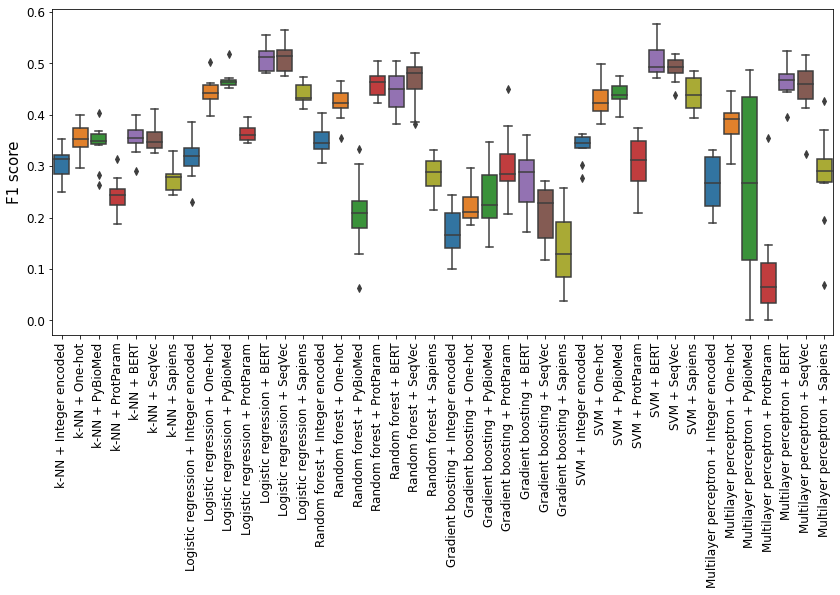

In [81]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x="label", y="F1", data=f1_df, order=ORDER, palette=sns.color_palette("tab10")[:6] + sns.color_palette("tab10")[-2:-1])
#labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(order, rotation = 90)
ax.set_xlabel("")
ax.set_ylabel("F1 score", size=15)
#ax.yaxis.grid(False)
#ax.xaxis.grid(True)
#ax.set_axisbelow(True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_all.png"), bbox_inches='tight')
plt.show()

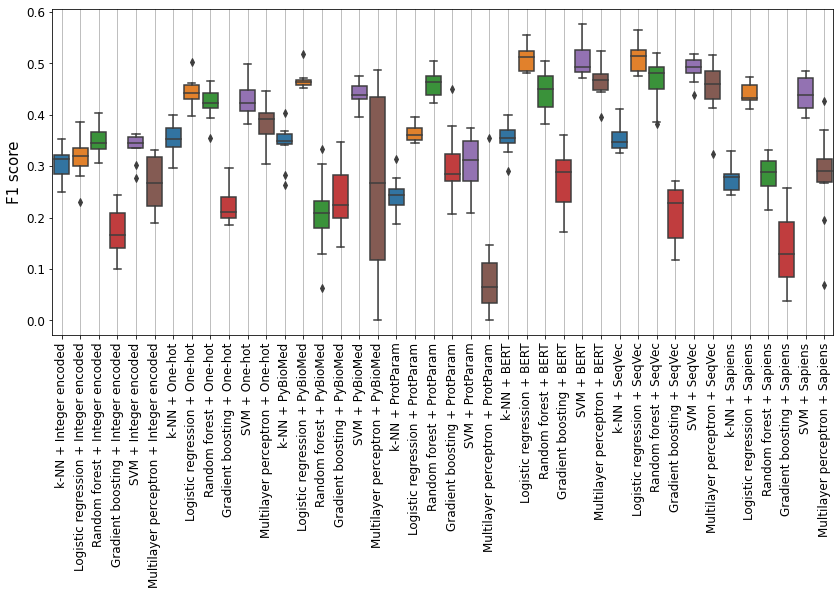

In [82]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x="label", y="F1", data=f1_df, order=ORDER_DATA, palette=sns.color_palette("tab10")[:6])
#labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(order_data, rotation = 90)
ax.set_xlabel("")
ax.set_ylabel("F1 score", size=15)
ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.set_axisbelow(True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_all_by_data_grid.png"), bbox_inches='tight')
plt.show()

## Different models

In [19]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    f1_scores[model_name] = list(df_concat[df_concat["model_name"] == model_name]["F1"])

In [20]:
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [40]:
stat, p = kruskal(*scores)
p

1.916762837476448e-34

In [87]:
df_subsets = []
for key, value in best_for_model.items():
    df_subsets.append(f1_df[(f1_df["model_name"] == key) & (f1_df["data"] == value)])
df_subset = pd.concat(df_subsets)

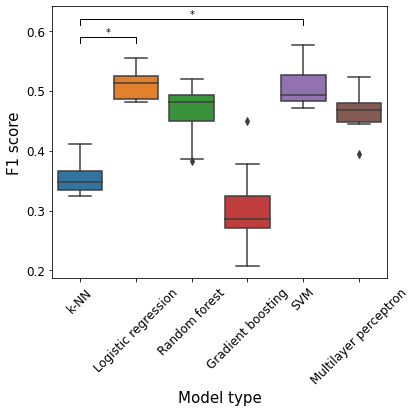

In [88]:
plt.figure(figsize=(6,5))
order = ["kNN", "logistic_regression", "random_forest", "gradient_boosting", "SVM", "multilayer_perceptron"]
ax = sns.boxplot(x="model_name", y="F1", data=df_subset, order=order)
labels = ["k-NN", "Logistic regression", "Random forest", "Gradient boosting", "SVM", "Multilayer perceptron"]
ax.set_xticklabels(labels,rotation = 45, size=12)
plt.yticks(fontsize=12)
ax.set_xlabel("Model type", size=15)
ax.set_ylabel("F1 score", size=15)
x1, x2 = 0, 4 
y, h, col = 0.61, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 0, 1 
y, h, col = 0.58, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_models.png"), bbox_inches='tight')
plt.show()

## Different data representations

In [77]:
f1_scores = {}
for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
    f1_scores[data_rep] = list(df_concat[df_concat["data"] == data_rep]["F1"])

In [43]:
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [44]:
stat, p = kruskal(*scores)
p

9.651044907577261e-18

In [89]:
df_subsets = []
for key, value in best_for_data.items():
    df_subsets.append(f1_df[(f1_df["model_name"] == value) & (f1_df["data"] == key)])
df_subset = pd.concat(df_subsets)

In [ ]:
"""bert logistic_regression integer_encoded random_forest
onehot logistic_regression integer_encoded random_forest
pybiomed logistic_regression integer_encoded random_forest
seqvec logistic_regression protparam random_forest"""

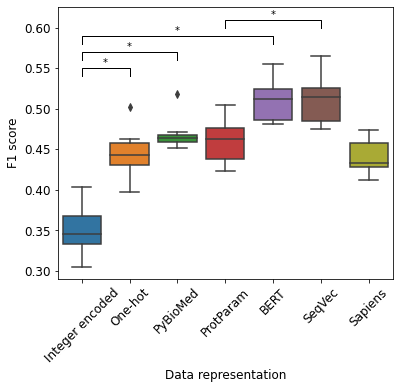

In [90]:
plt.figure(figsize=(6,5))
order = ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.boxplot(x="data", y="F1", data=df_subset, order=order, palette=sns.color_palette("tab10")[:6] + sns.color_palette("tab10")[-2:-1])
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 45, size=12)
ax.set_xlabel("Data representation", size=12)
ax.set_ylabel("F1 score", size=12)
plt.yticks(fontsize=12)
x1, x2 = 0, 4 
y, h, col = 0.58, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 0, 1 
y, h, col = 0.54, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 0, 2 
y, h, col = 0.56, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 3, 5
y, h, col = 0.60, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_data.png"), bbox_inches='tight')
plt.show()

In [91]:
df_subsets = []
for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
    df_subsets.append(f1_df[(f1_df["model_name"] == "logistic_regression") & (f1_df["data"] == data_rep)])
df_subset = pd.concat(df_subsets)

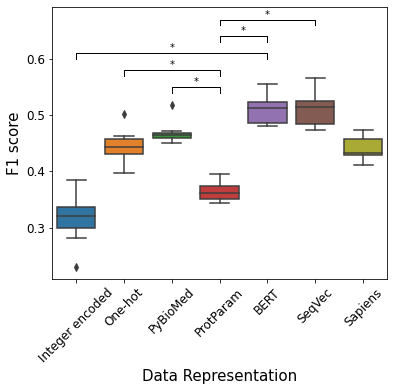

In [92]:
plt.figure(figsize=(6,5))
order = ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.boxplot(x="data", y="F1", data=df_subset, order=order, palette=sns.color_palette("tab10")[:6] + sns.color_palette("tab10")[-2:-1])
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 45, size=12)
ax.set_xlabel("Data Representation", size=15)
ax.set_ylabel("F1 score", size=15)
plt.yticks(fontsize=12)
x1, x2 = 0, 4 
y, h, col = 0.6, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 2, 3 
y, h, col = 0.54, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 3, 4 
y, h, col = 0.63, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 3, 5 
y, h, col = 0.66, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
x1, x2 = 1, 3 
y, h, col = 0.57, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')
plt.savefig(path.join(DATA_DIR, "images/box_f1_of_5x2cv_data_with_log_reg.png"), bbox_inches='tight')
plt.show()

# Paired t-tests

In [28]:
seeds = [4, 18, 27, 36, 42]

In [26]:
def prepare_test_metrics(model_a, data_a, model_b, data_b):
    metrics_a = np.zeros((5,2))
    metrics_b = np.zeros((5,2))
    i = 0
    for seed in seeds:
        for j, letter in enumerate(["a", "b"]):
            res = split_results[str(seed) + letter]
            f1_a = res[(res["model_name"] == model_a) & (res["data"] == data_a)]["F1"]
            f1_b = res[(res["model_name"] == model_b) & (res["data"] == data_b)]["F1"]
            metrics_a[i][j] = f1_a
            metrics_b[i][j] = f1_b
        i += 1
    return metrics_a, metrics_b

In [27]:
def paired_f_test(metrics_a, metrics_b):
    s = []
    diffs = []
    for i in range(5):
        p_0 = metrics_a[i][0] - metrics_b[i][0]
        p_1 = metrics_a[i][1] - metrics_b[i][1]
        p_avg = mean([p_0, p_1])
        s2 = (p_0 - p_avg) ** 2 + (p_1 - p_avg) ** 2
        s.append(s2)
        diffs += [p_0, p_1]
        
    f = sum(p ** 2 for p in diffs) / (2 * sum(s))
    p_value = scipy.stats.f.sf(f, 10, 5)
    return f, p_value

In [28]:
met_a, met_b = prepare_test_metrics("kNN", "onehot", "logistic_regression", "bert")
paired_f_test(met_a, met_b)

(16.025128856113962, 0.0034242533285473832)

In [29]:
from statsmodels.stats.multitest import multipletests

In [30]:
model_list = [
    (mod, dat) for mod in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"] 
    for dat in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]
]
len(model_list)

42

In [31]:
p_values = []
tested_models = []

for i, comb_1 in enumerate(model_list):
    for comb_2 in model_list[i:]:
        mod_1, dat_1 = comb_1
        mod_2, dat_2 = comb_2
        if mod_1 != mod_2 or dat_1 != dat_2:
            tested_models.append((comb_1, comb_2))
            met_1, met_2 = prepare_test_metrics(mod_1, dat_1, mod_2, dat_2)
            f, p = paired_f_test(met_1, met_2)
            p_values.append(p)

In [32]:
print(min(p_values))
max(p_values)

6.253258262976341e-05


0.824120396149362

In [33]:
reject, p_vals_corr, _, _ = multipletests(p_values, 0.05, "fdr_bh")

In [34]:
sum(reject)

183

In [35]:
len(p_vals_corr)

861

In [36]:
print(min(p_vals_corr))
max(p_vals_corr)

0.023802395607662487


0.824120396149362

In [213]:
with open(path.join(DATA_DIR, "evaluations/corrected_p_values.csv"), "w") as f:
    for p, label in zip(p_vals_corr, tested_models):
        f.write(f"{label},{p}\n")

In [37]:
sorted_pvals, sorted_labels = zip(*sorted(zip(p_vals_corr, tested_models)))
sorted_labels[:5]

((('SVM', 'pybiomed'), ('gradient_boosting', 'onehot')),
 (('kNN', 'bert'), ('logistic_regression', 'pybiomed')),
 (('kNN', 'onehot'), ('logistic_regression', 'pybiomed')),
 (('kNN', 'protparam'), ('SVM', 'pybiomed')),
 (('kNN', 'protparam'), ('SVM', 'seqvec')))

In [38]:
sorted_pvals[12:20]

(0.023802395607662487,
 0.023802395607662487,
 0.023802395607662487,
 0.023802395607662487,
 0.023802395607662487,
 0.02420135726070616,
 0.02962858175261298,
 0.02962858175261298)

In [40]:
i = 0
while sorted_pvals[i + 1] <= 0.05:
    i += 1
print(i)

182


In [179]:
with open(path.join(DATA_DIR, "evaluations/significant_pvals.csv"), "w") as f:
    for i, label in enumerate(sorted_labels[:183]):
        f.write(f"{nice_labels[label[0][0]]}+{nice_labels[label[0][1]]},{nice_labels[label[1][0]]}+{nice_labels[label[1][1]]},{sorted_pvals[i]}\n")

In [43]:
def check_significance(model1, data1, model2, data2):
    for i in range(183):
        label = sorted_labels[i]
        if label[0][0] == model1 and label[0][1] == data1 and label[1][0] == model2 and label[1][1] == data2:
            p = sorted_pvals[i]
            return True, p
    return False, None

In [44]:
check_significance("logistic_regression", "bert", "SVM", "bert")

(False, None)

In [45]:
for key, value in best_for_model.items():
    for key2, value2 in best_for_model.items():
        signif, p = check_significance(key, value, key2, value2)
        if signif:
            print(key, value, key2, value2, p)

kNN seqvec SVM bert 0.03570315914997941
kNN seqvec logistic_regression bert 0.03369840704598259


In [57]:
for key, value in best_for_data.items():
    for key2, value2 in best_for_data.items():
        signif, p = check_significance(value, key, value2, key2)
        if signif:
            print(key, value, key2, value2, p)

bert logistic_regression integer_encoded random_forest 0.04765392060328768
onehot logistic_regression integer_encoded random_forest 0.046897784107998934
pybiomed logistic_regression integer_encoded random_forest 0.04116991481988558
seqvec logistic_regression protparam random_forest 0.03369840704598259


In [61]:
for i, data1 in enumerate(["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]):
    for data2 in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"][i:]:
        signif, p = check_significance("logistic_regression", data1, "logistic_regression", data2)
        if signif:
            print(data1, data2, p)

integer_encoded bert 0.042891511057454076
pybiomed protparam 0.037687675759152835
protparam bert 0.03369840704598259
protparam seqvec 0.03570315914997941
protparam onehot 0.037282894221966074


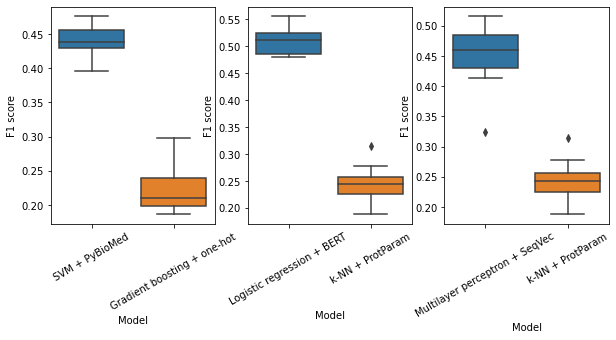

In [68]:
mod_a = df_concat[(df_concat["model_name"] == "SVM") & (df_concat["data"] == "pybiomed")]
mod_b = df_concat[(df_concat["model_name"] == "gradient_boosting") & (df_concat["data"] == "onehot")]

mod_c = df_concat[(df_concat["model_name"] == "logistic_regression") & (df_concat["data"] == "bert")]
mod_d = df_concat[(df_concat["model_name"] == "kNN") & (df_concat["data"] == "protparam")]

mod_e = df_concat[(df_concat["model_name"] == "multilayer_perceptron") & (df_concat["data"] == "seqvec")]
mod_f = df_concat[(df_concat["model_name"] == "kNN") & (df_concat["data"] == "protparam")]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

sns.boxplot(x="model_name", y="F1", data=pd.concat([mod_a, mod_b]), ax=ax1)
sns.boxplot(x="model_name", y="F1", data=pd.concat([mod_c, mod_d]), ax=ax2)
sns.boxplot(x="model_name", y="F1", data=pd.concat([mod_e, mod_f]), ax=ax3)

labels = ["SVM + PyBioMed", "Gradient boosting + one-hot"]
ax1.set_xticklabels(labels,rotation = 30)
ax1.set_xlabel("Model")
ax1.set_ylabel("F1 score")

labels = ["Logistic regression + BERT", "k-NN + ProtParam"]
ax2.set_xticklabels(labels,rotation = 30)
ax2.set_xlabel("Model")
ax2.set_ylabel("F1 score")

labels = ["Multilayer perceptron + SeqVec", "k-NN + ProtParam"]
ax3.set_xticklabels(labels,rotation = 30)
ax3.set_xlabel("Model")
ax3.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/box_max_diffs.png"), bbox_inches='tight')
plt.show()

# Mann-Whitney U

In [103]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1_scores[f"{model_name}_{data_rep}"] = list(df_concat[(df_concat["model_name"] == model_name) & (df_concat["data"] == data_rep)]["F1"])
        
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [118]:
p_values = []
tested_models = []

for i, (label_1, scores_1) in enumerate(zip(labels, scores)):
    for label_2, scores_2 in zip(labels[i:], scores[i:]):
        if label_1 != label_2:
            p = scipy.stats.mannwhitneyu(scores_1, scores_2)
            p_values.append(p.pvalue)
            tested_models.append((label_1, label_2))

In [119]:
print(min(p_values))
max(p_values)

0.0001806347208075351


1.0

In [120]:
reject, p_vals_corr, _, _ = multipletests(p_values, 0.1, "fdr_bh")
sum(reject)

692

In [121]:
print(min(p_vals_corr))
max(p_vals_corr)

0.00047089943756084606


1.0

## Different models

In [127]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1_scores[model_name] = f1_scores.get(model_name, []) + list(df_concat[df_concat["model_name"] == model_name]["F1"])
        
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [129]:
p_values = []
tested_models = []

for i, (label_1, scores_1) in enumerate(zip(labels, scores)):
    for label_2, scores_2 in zip(labels[i:], scores[i:]):
        if label_1 != label_2:
            p = scipy.stats.mannwhitneyu(scores_1, scores_2)
            p_values.append(p.pvalue)
            tested_models.append((label_1, label_2))

In [130]:
print(min(p_values))
print(max(p_values))
reject, p_vals_corr, _, _ = multipletests(p_values, 0.1, "fdr_bh")
sum(reject)

1.358821971633608e-144
0.0025330431784499224


15

In [132]:
print(min(p_vals_corr))
max(p_vals_corr)

2.0382329574504118e-143


0.0025330431784499224

## Different data representations

In [133]:
f1_scores = {}
for model_name in ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]:
    for data_rep in ["integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "sapiens", "onehot"]:
        f1_scores[data_rep] = f1_scores.get(data_rep, []) + list(df_concat[df_concat["data"] == data_rep]["F1"])
        
labels = []
scores = []
for key, value in f1_scores.items():
    labels.append(key)
    scores.append(value)

In [134]:
p_values = []
tested_models = []

for i, (label_1, scores_1) in enumerate(zip(labels, scores)):
    for label_2, scores_2 in zip(labels[i:], scores[i:]):
        if label_1 != label_2:
            p = scipy.stats.mannwhitneyu(scores_1, scores_2)
            p_values.append(p.pvalue)
            tested_models.append((label_1, label_2))

In [135]:
print(min(p_values))
print(max(p_values))
reject, p_vals_corr, _, _ = multipletests(p_values, 0.1, "fdr_bh")
print(len(p_vals_corr))
sum(reject)

7.535751323550364e-66
0.4820863685968657
21


19

In [136]:
print(min(p_vals_corr))
max(p_vals_corr)

1.5825077779455763e-64


0.4820863685968657

# Evaluation on TAP

In [94]:
split_results_tap = {}
for seed in seeds:
    results_a = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_a", 
        "tap.csv"
    ), sep="\t", header=None)
    results_b = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/5x2cv", 
        f"training_split_{str(seed)}_b", 
        "tap.csv"
    ), sep="\t", header=None)
    results_a.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    results_b.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    
    split_results_tap[str(seed) + "a"] = results_a    
    split_results_tap[str(seed) + "b"] = results_b

In [95]:

df_list = [value for key, value in split_results_tap.items()]
# Concatenate results for all data splits
df_concat_tap = pd.concat(df_list)
df_concat_tap.index = pd.MultiIndex.from_arrays(
    df_concat_tap[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [96]:
df_concat_tap.drop("filename", axis=1)

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,integer_encoded,scaling,kNN,integer_encoded,scaling,0.298077,-0.025344,0.206522,0.939394,0.177143,0.477460
logistic_regression,integer_encoded,scaling,logistic_regression,integer_encoded,scaling,0.471616,0.146160,0.342391,1.000000,0.308571,0.654286
random_forest,integer_encoded,scaling,random_forest,integer_encoded,scaling,0.495798,-0.048773,0.347826,0.936508,0.337143,0.446349
multilayer_perceptron,integer_encoded,scaling,multilayer_perceptron,integer_encoded,scaling,0.264706,-0.040214,0.184783,0.931034,0.154286,0.466032
SVM,integer_encoded,scaling,SVM,integer_encoded,scaling,0.558704,0.026937,0.407609,0.958333,0.394286,0.530476
...,...,...,...,...,...,...,...,...,...,...,...
logistic_regression,onehot,scaling,logistic_regression,onehot,scaling,0.598425,0.043989,0.445652,0.962025,0.434286,0.550476
random_forest,onehot,scaling,random_forest,onehot,scaling,0.725979,0.060411,0.581522,0.962264,0.582857,0.569206
multilayer_perceptron,onehot,scaling,multilayer_perceptron,onehot,scaling,0.366972,-0.053395,0.250000,0.930233,0.228571,0.447619


In [97]:
acc_df_tap = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1", "Acc"]]

In [98]:
acc_df_tap["label"] = acc_df_tap.apply(get_readable_label, axis=1)

In [30]:
tap_grouped = df_concat_tap.groupby(level=[0,1,2])
tap_means = tap_grouped.mean()

In [31]:
tap_means

F1       MCC  \
model_name            data            preprocessing                       
SVM                   bert            scaling        0.639614  0.002325   
                      integer_encoded scaling        0.551861 -0.004530   
                      onehot          scaling        0.659523  0.021863   
                      protparam       scaling        0.739404  0.007541   
                      pybiomed        scaling        0.528616 -0.010009   
                      sapiens         scaling        0.702048  0.044045   
                      seqvec          scaling        0.744843  0.010376   
gradient_boosting     bert            scaling        0.254777  0.014592   
                      integer_encoded scaling        0.181522 -0.051807   
                      onehot          scaling        0.184644 -0.027233   
                      protparam       scaling        0.216468  0.000905   
                      pybiomed        scaling        0.178827 -0.036170   
                      sapiens         scaling        0.200576 -0.006061   
                      seqvec          scaling        0.155634 -0.050635   
kNN                   bert            scaling        0.505866 -0.059069   
                      integer_encoded scaling        0.364754  0.058458   
                      onehot          scaling        0.513185 -0.079408   
                      protparam       scaling        0.397062 -0.052425   
                      pybiomed        scaling        0.397126 -0.106174   
                      sapiens         scaling        0.442738  0.016898   
                      seqvec          scaling        0.400181  0.010699   
logistic_regression   bert            scaling        0.567127  0.002858   
                      integer_encoded scaling        0.473897  0.018738   
                      onehot          scaling        0.578790  0.002694   
                      protparam       scaling        0.714035  0.021340   
                      pybiomed        scaling        0.575183  0.010026   
                      sapiens         scaling        0.755922  0.051307   
                      seqvec          scaling        0.654891  0.014147   
multilayer_perceptron bert            scaling        0.431185  0.002108   
                      integer_encoded scaling        0.346775 -0.027654   
                      onehot          scaling        0.381917 -0.034495   
                      protparam       scaling        0.108979 -0.051044   
                      pybiomed        scaling        0.275734 -0.035462   
                      sapiens         scaling        0.376194  0.001019   
                      seqvec          scaling        0.463151 -0.000841   
random_forest         bert            scaling        0.484755 -0.022858   
                      integer_encoded scaling        0.550921 -0.023694   
                      onehot          scaling        0.650203 -0.015829   
                      protparam       scaling        0.545287  0.060694   
                      pybiomed        scaling        0.144233 -0.080449   
                      sapiens         scaling        0.339672 -0.001619   
                      seqvec          scaling        0.572950  0.000748   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
SVM                   bert            scaling        0.484783   0.951815   
                      integer_encoded scaling        0.400000   0.949913   
                      onehot          scaling        0.507609   0.955798   
                      protparam       scaling        0.597283   0.952780   
                      pybiomed        scaling        0.378804   0.948089   
                      sapiens         scaling        0.555978   0.959624   
                      seqvec          scaling        0.603261   0.953162   
gradient_boosting     bert            scaling        0.183152   0.958096  

In [32]:
tap_means.groupby("model_name")[["F1", "Acc"]].mean()

,F1,Acc
model_name,,
SVM,0.652273,0.503960
gradient_boosting,0.196064,0.147826
kNN,0.431559,0.301553
logistic_regression,0.617121,0.469255
multilayer_perceptron,0.340562,0.247516
random_forest,0.469717,0.344022


In [33]:
idx = tap_means.groupby(['model_name'])['Acc'].transform(max) == tap_means['Acc']
tap_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,seqvec,scaling,0.744843,0.010376,0.603261,0.953162,0.613143,0.512127
gradient_boosting,bert,scaling,0.254777,0.014592,0.183152,0.958096,0.147429,0.512603
kNN,onehot,scaling,0.513185,-0.079408,0.362500,0.928437,0.357143,0.411905
logistic_regression,sapiens,scaling,0.755922,0.051307,0.619565,0.959967,0.626286,0.557587
multilayer_perceptron,seqvec,scaling,0.463151,-0.000841,0.326087,0.951568,0.307429,0.498159
random_forest,onehot,scaling,0.650203,-0.015829,0.495109,0.947508,0.496571,0.481619


In [44]:
idx = df_means.groupby(['model_name'])['Acc'].transform(max) == df_means['Acc']
df_means[idx]

,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,,,,,,
SVM,pybiomed,0.440407,0.284269,0.745837,0.400889,0.497485,0.653914
gradient_boosting,protparam,0.303578,0.259314,0.806938,0.573935,0.210143,0.585256
kNN,integer_encoded,0.306184,0.147960,0.733124,0.330824,0.296283,0.571050
logistic_regression,bert,0.511498,0.372874,0.770851,0.451917,0.594403,0.705310
multilayer_perceptron,bert,0.464615,0.350077,0.801948,0.517870,0.428143,0.663006
random_forest,pybiomed,0.207997,0.215087,0.805823,0.641444,0.128844,0.554232


In [45]:
tap_means.groupby("data")[["F1", "Acc"]].mean()

,F1,Acc
data,,
bert,0.480554,0.347373
integer_encoded,0.411621,0.295199
onehot,0.494710,0.365761
protparam,0.453539,0.351630
pybiomed,0.349953,0.256884
sapiens,0.469525,0.357428
seqvec,0.498609,0.375543


In [46]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  Precision  \
model_name            data                                                 
logistic_regression   bert       0.511498  0.372874  0.770851   0.451917   
                      seqvec     0.510053  0.365731  0.735306   0.407988   
SVM                   bert       0.507515  0.362930  0.738193   0.412027   
                      seqvec     0.489386  0.340335  0.674513   0.358976   
logistic_regression   pybiomed   0.467703  0.312537  0.742092   0.403834   
random_forest         seqvec     0.465558  0.314144  0.756662   0.419259   
multilayer_perceptron bert       0.464615  0.350077  0.801948   0.517870   
random_forest         protparam  0.461603  0.306881  0.744443   0.405028   
multilayer_perceptron seqvec     0.449182  0.324202  0.789333   0.480557   
random_forest         bert       0.445334  0.316399  0.786602   0.473515   

                                   Recall       AUC  
model_name            data                           
logistic_regression   bert       0.594403  0.705310  
                      seqvec     0.682900  0.715542  
SVM                   bert       0.667665  0.711918  
                      seqvec     0.770563  0.709496  
logistic_regression   pybiomed   0.561968  0.675210  
random_forest         seqvec     0.525549  0.670094  
multilayer_perceptron bert       0.428143  0.663006  
random_forest         protparam  0.544131  0.670257  
multilayer_perceptron seqvec     0.430603  0.655851  
random_forest         bert       0.425339  0.651842

In [162]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

In [47]:
tap_means.nlargest(10, 'Acc')

F1       MCC       Acc  \
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling        0.755922  0.051307  0.619565   
SVM                 seqvec    scaling        0.744843  0.010376  0.603261   
                    protparam scaling        0.739404  0.007541  0.597283   
logistic_regression protparam scaling        0.714035  0.021340  0.566304   
SVM                 sapiens   scaling        0.702048  0.044045  0.555978   
                    onehot    scaling        0.659523  0.021863  0.507609   
logistic_regression seqvec    scaling        0.654891  0.014147  0.501087   
random_forest       onehot    scaling        0.650203 -0.015829  0.495109   
SVM                 bert      scaling        0.639614  0.002325  0.484783   
logistic_regression onehot    scaling        0.578790  0.002694  0.425000   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling         0.959967  0.626286  0.557587  
SVM                 seqvec    scaling         0.953162  0.613143  0.512127  
                    protparam scaling         0.952780  0.606857  0.508984  
logistic_regression protparam scaling         0.954920  0.570857  0.524317  
SVM                 sapiens   scaling         0.959624  0.556571  0.550508  
                    onehot    scaling         0.955798  0.505714  0.525079  
logistic_regression seqvec    scaling         0.954225  0.499429  0.516381  
random_forest       onehot    scaling         0.947508  0.496571  0.481619  
SVM                 bert      scaling         0.951815  0.482857  0.502540  
logistic_regression onehot    scaling         0.952159  0.416571  0.502730

In [65]:
# How did the best models from TAP do on test?

In [50]:
idx = tap_means.nlargest(10, 'Acc')["Acc"].index
tap_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling        0.755922  0.051307  0.619565   
SVM                 seqvec    scaling        0.744843  0.010376  0.603261   
                    protparam scaling        0.739404  0.007541  0.597283   
logistic_regression protparam scaling        0.714035  0.021340  0.566304   
SVM                 sapiens   scaling        0.702048  0.044045  0.555978   
                    onehot    scaling        0.659523  0.021863  0.507609   
logistic_regression seqvec    scaling        0.654891  0.014147  0.501087   
random_forest       onehot    scaling        0.650203 -0.015829  0.495109   
SVM                 bert      scaling        0.639614  0.002325  0.484783   
logistic_regression onehot    scaling        0.578790  0.002694  0.425000   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling         0.959967  0.626286  0.557587  
SVM                 seqvec    scaling         0.953162  0.613143  0.512127  
                    protparam scaling         0.952780  0.606857  0.508984  
logistic_regression protparam scaling         0.954920  0.570857  0.524317  
SVM                 sapiens   scaling         0.959624  0.556571  0.550508  
                    onehot    scaling         0.955798  0.505714  0.525079  
logistic_regression seqvec    scaling         0.954225  0.499429  0.516381  
random_forest       onehot    scaling         0.947508  0.496571  0.481619  
SVM                 bert      scaling         0.951815  0.482857  0.502540  
logistic_regression onehot    scaling         0.952159  0.416571  0.502730

In [51]:
df_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling        0.440547  0.268239  0.635459   
SVM                 seqvec    scaling        0.489386  0.340335  0.674513   
                    protparam scaling        0.303986  0.010289  0.457847   
logistic_regression protparam scaling        0.364121  0.139984  0.592097   
SVM                 sapiens   scaling        0.440024  0.267177  0.668604   
                    onehot    scaling        0.430088  0.257971  0.720027   
logistic_regression seqvec    scaling        0.510053  0.365731  0.735306   
random_forest       onehot    scaling        0.421371  0.243352  0.703104   
SVM                 bert      scaling        0.507515  0.362930  0.738193   
logistic_regression onehot    scaling        0.445289  0.288201  0.748644   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
logistic_regression sapiens   scaling         0.317317  0.721630  0.667069  
SVM                 seqvec    scaling         0.358976  0.770563  0.709496  
                    protparam scaling         0.205467  0.588839  0.505794  
logistic_regression protparam scaling         0.267506  0.577457  0.586825  
SVM                 sapiens   scaling         0.331980  0.655419  0.662689  
                    onehot    scaling         0.371060  0.516170  0.643586  
logistic_regression seqvec    scaling         0.407988  0.682900  0.715542  
random_forest       onehot    scaling         0.350471  0.533514  0.639408  
SVM                 bert      scaling         0.412027  0.667665  0.711918  
logistic_regression onehot    scaling         0.404620  0.498170  0.655414

In [102]:
order

['integer_encoded',
 'onehot',
 'pybiomed',
 'protparam',
 'bert',
 'seqvec',
 'sapiens']

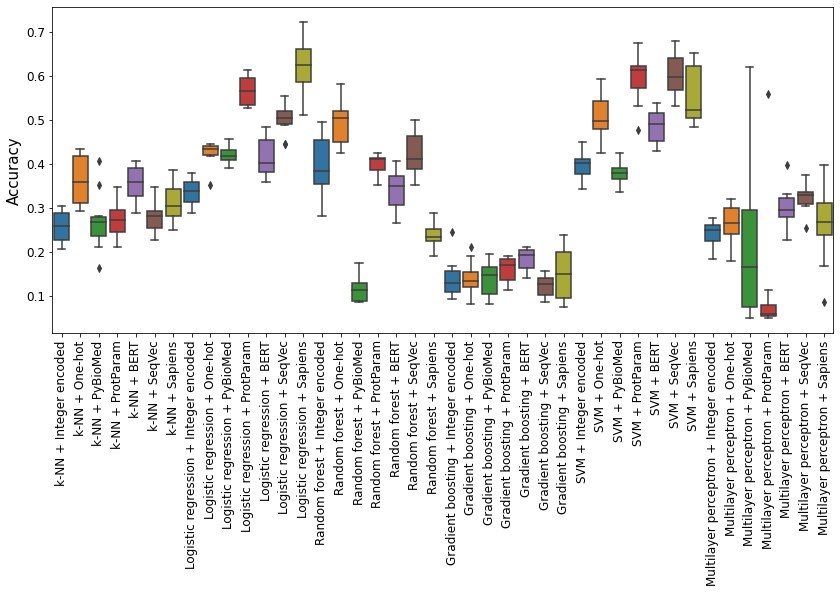

In [107]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x="label", y="Acc", data=acc_df_tap, order=ORDER, palette=sns.color_palette("tab10")[:6] + sns.color_palette("tab10")[-2:-1])
#labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(order, rotation = 90, size=12)
ax.set_xlabel("")
ax.set_ylabel("Accuracy", size=15)
plt.yticks(fontsize=12)
#ax.yaxis.grid(False)
#ax.xaxis.grid(True)
#ax.set_axisbelow(True)
plt.savefig(path.join(DATA_DIR, "images/box_tap_acc_of_5x2cv_all.png"), bbox_inches='tight')
plt.show()

# Error bars

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

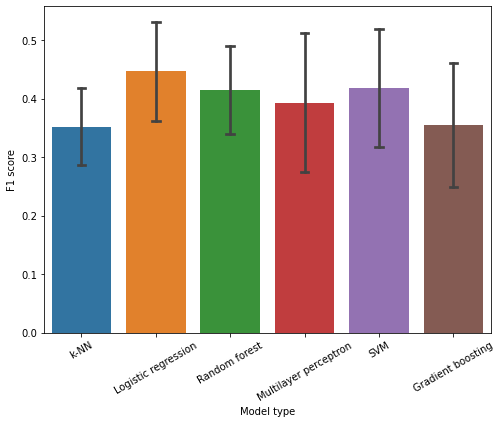

In [155]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [18]:
f1_df.groupby(['model_name'])['F1'].describe()[['mean','std']]

,mean,std
model_name,,
SVM,0.418596,0.100770
gradient_boosting,0.354892,0.106061
kNN,0.351456,0.065967
logistic_regression,0.446291,0.084693
multilayer_perceptron,0.393195,0.118535
random_forest,0.415037,0.074936


In [60]:
grouped = df_concat.groupby(level=[0,1,2])
grouped

In [85]:
means = grouped.mean()[["F1"]]
means.rename({"F1": "mean"}, axis=1, inplace=True)
se = grouped.std()[["F1"]]
se.rename({"F1": "sd"}, axis=1, inplace=True)

In [86]:
pd.concat([means, se], axis=1)

mean        sd
model_name    data   preprocessing                    
SVM           bert   no_prepro      0.507240  0.054367
                     oversampling   0.506687  0.062805
                     scaling        0.505689  0.065583
                     smote_os       0.501018  0.072398
                     undersampling  0.488984  0.047544
...                                      ...       ...
random_forest seqvec no_prepro      0.451953  0.065148
                     oversampling   0.447549  0.053766
                     scaling        0.414400  0.067502
                     smote_os       0.447118  0.071582
                     undersampling  0.463626  0.032578

[210 rows x 2 columns]

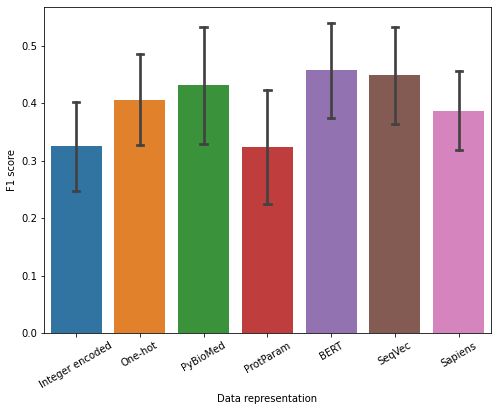

In [156]:
plt.figure(figsize=(8,6))
order = ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

In [157]:
f1_df.groupby(['data'])['F1'].describe()[['mean','std']]

,mean,std
data,,
bert,0.456629,0.083430
integer_encoded,0.324629,0.078016
onehot,0.405819,0.078909
protparam,0.323212,0.099665
pybiomed,0.430884,0.101336
sapiens,0.386767,0.069128
seqvec,0.448105,0.084763


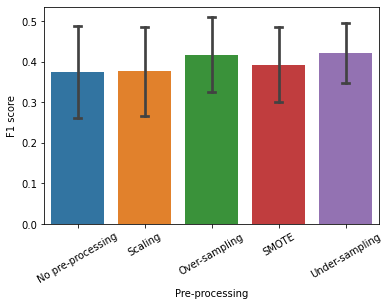

In [158]:
plt.figure(figsize=(6,4))
order = ["no_prepro", "scaling", "oversampling", "smote_os", "undersampling"]
ax = sns.barplot(x="preprocessing", y="F1", data=f1_df, ci="sd", order=order, capsize=0.1)
labels = ["No pre-processing", "Scaling", "Over-sampling", "SMOTE", "Under-sampling"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Pre-processing")
ax.set_ylabel("F1 score")
plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_prepro.png"), bbox_inches='tight')
plt.show()

In [160]:
f1_df.groupby(['preprocessing'])['F1'].describe()[['mean','std']]

,mean,std
preprocessing,,
no_prepro,0.374623,0.113719
oversampling,0.417431,0.093019
scaling,0.376273,0.109847
smote_os,0.392647,0.093026
undersampling,0.421915,0.073670


# TAP

In [68]:
tap_acc_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1", "Acc"]]

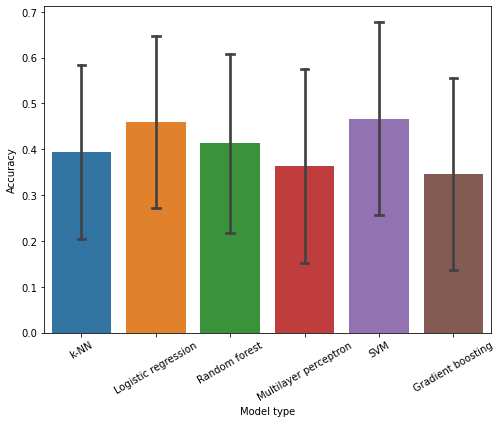

In [164]:
plt.figure(figsize=(8,6))
order = ["kNN", "logistic_regression", "random_forest", "multilayer_perceptron", "SVM", "gradient_boosting"]
ax = sns.barplot(x="model_name", y="Acc", data=tap_acc_df, ci="sd", order=order, capsize=0.1)
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [166]:
tap_acc_df.groupby(['model_name'])['F1'].describe()[['mean','std']]

,mean,std
model_name,,
SVM,0.581682,0.265306
gradient_boosting,0.451805,0.247997
kNN,0.511883,0.248713
logistic_regression,0.581345,0.248390
multilayer_perceptron,0.467443,0.258766
random_forest,0.531055,0.243731


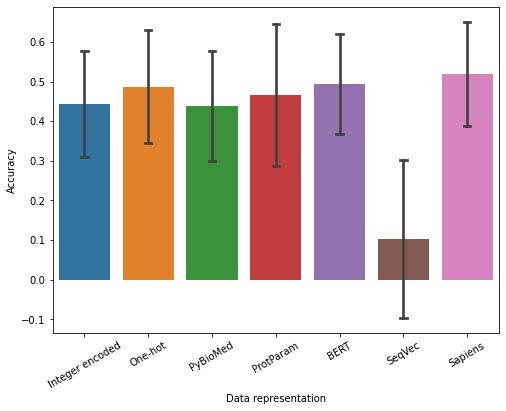

In [167]:
plt.figure(figsize=(8,6))
order =  ["integer_encoded", "onehot", "pybiomed", "protparam", "bert", "seqvec", "sapiens"]
ax = sns.barplot(x="data", y="Acc", data=tap_acc_df, ci="sd", order=order, capsize=0.1)
labels = ["Integer encoded", "One-hot", "PyBioMed", "ProtParam", "BERT", "SeqVec", "Sapiens"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("Accuracy")
plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

In [168]:
tap_acc_df.groupby(['data'])['F1'].describe()[['mean','std']]

,mean,std
data,,
bert,0.639110,0.128487
integer_encoded,0.586017,0.147697
onehot,0.631290,0.141354
protparam,0.598822,0.185475
pybiomed,0.580580,0.150034
sapiens,0.659864,0.130157
seqvec,0.069055,0.226902


## Heatmap

In [109]:
f1_df_hm = f1_df.reset_index(drop=True)

In [110]:
reindexed = df_means.reset_index()

In [111]:
grouped = reindexed.groupby(["model_name", "data"], as_index=False).mean()

In [112]:
unstacked = grouped.pivot("model_name", "data", "F1")[["integer_encoded", "onehot", "protparam", "pybiomed", "bert", "seqvec", "sapiens"]]
unstacked = pd.concat([unstacked.iloc[2:3], unstacked.iloc[3:4], unstacked.iloc[5:6], unstacked.iloc[1:2], unstacked.iloc[0:1], unstacked.iloc[4:5]])
unstacked

data,integer_encoded,onehot,protparam,pybiomed,bert,seqvec,sapiens
model_name,,,,,,,
kNN,0.306184,0.351777,0.245259,0.342626,0.353010,0.353629,0.278531
logistic_regression,0.315693,0.445289,0.364121,0.467703,0.511498,0.510053,0.440547
random_forest,0.349876,0.421371,0.461603,0.207997,0.445334,0.465558,0.282824
gradient_boosting,0.169952,0.223478,0.303578,0.239182,0.278702,0.209354,0.136349
SVM,0.337540,0.430088,0.303986,0.440407,0.507515,0.489386,0.440024
multilayer_perceptron,0.267335,0.386076,0.092959,0.261821,0.464615,0.449182,0.281713


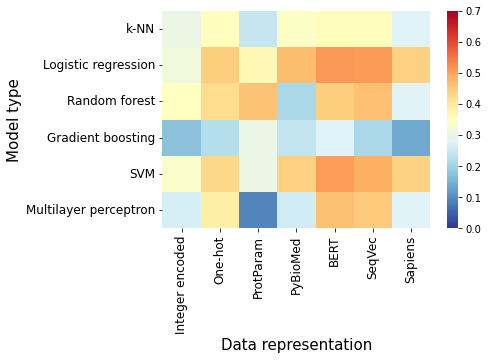

In [113]:
xlabels = ["Integer encoded", "One-hot", "ProtParam", "PyBioMed", "BERT", "SeqVec", "Sapiens"]
ylabels = ["k-NN", "Logistic regression", "Random forest", "Gradient boosting", "SVM", "Multilayer perceptron"]
ax = sns.heatmap(
    unstacked, xticklabels=xlabels, yticklabels=ylabels, cmap="RdYlBu_r", vmin=0, vmax=0.7
)
ax.set_ylabel("Model type", size=15)
ax.set_xlabel("Data representation", size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(path.join(DATA_DIR, "images/heatmap.png"), bbox_inches='tight')

## ProteinBERT

In [122]:
df_bert = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.526, 0.636, 0.486, 0.324, 0.492, 0.657, 0.482, 0.535, 0.487, 0.417], # F1
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [1,1,1,1,1,1,1,1,1,1]
})

In [124]:
df_acc = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.580, 0.589, 0.598, 0.560, 0.610, 0.535,0.676, 0.560, 0.515, 0.639], # Accuracy
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [0,0,0,0,0,0,0,0,0,0]
})
df_bert_adj = pd.concat([df_bert, df_acc])

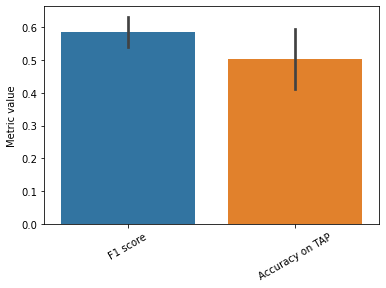

In [130]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="x", y="metric", data=df_bert_adj, ci="sd", capsize=0.1)
labels = ["F1 score", "Accuracy on TAP"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("")
ax.set_ylabel("Metric value")
plt.savefig(path.join(DATA_DIR, "images/f1_and_acc_protein_bert.png"), bbox_inches='tight')
plt.show()

# Stats

In [12]:
f1_df.head()

,model_name,data,preprocessing,F1
0,kNN,sapiens,no_prepro,0.326241
1,logistic_regression,sapiens,no_prepro,0.408696
2,random_forest,sapiens,no_prepro,0.395480
3,multilayer_perceptron,sapiens,no_prepro,0.369863
4,SVM,sapiens,no_prepro,0.398305


In [13]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

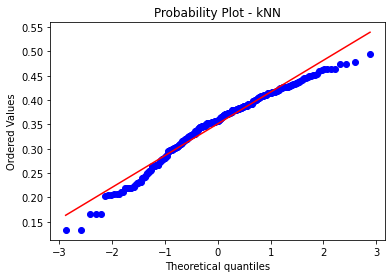

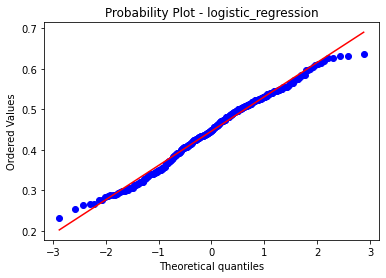

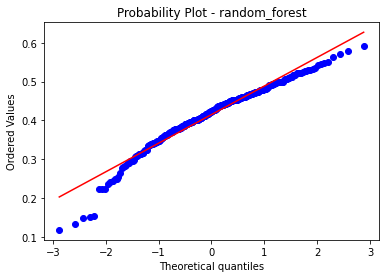

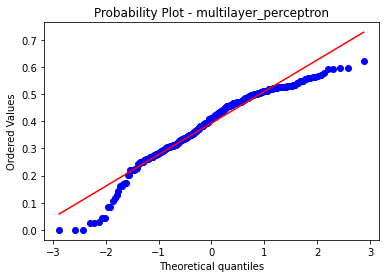

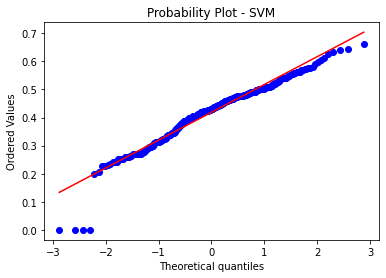

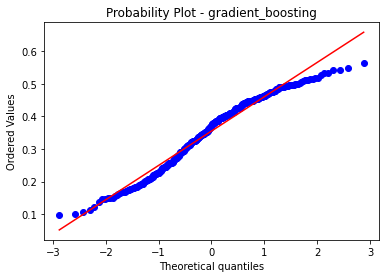

In [14]:
unique_models = f1_df['model_name'].unique()
for model in unique_models:
    stats.probplot(f1_df[f1_df['model_name'] == model]['F1'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  model)
    plt.show()

In [15]:
ratio = f1_df.groupby('model_name').std().max() / f1_df.groupby('model_name').std().min()
ratio
# < 2

F1    1.79688
dtype: float64

In [19]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = f1_df['F1'].mean()
SSTR = f1_df.groupby('model_name').count() * (f1_df.groupby('model_name').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['F1'].sum()

# calculate SSE and update anova table
SSE = (f1_df.groupby('model_name').count() - 1) * f1_df.groupby('model_name').std()**2
anova_table['SS']['Within Groups'] = SSE['F1'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['F1'].sum() + SSE['F1'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = f1_df['model_name'].nunique() - 1
anova_table['df']['Within Groups'] = f1_df.shape[0] - f1_df['model_name'].nunique()
anova_table['df']['Total'] = f1_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.478747,5,0.495749,56.555948,0.0,2.572534
Within Groups,18.355263,2094,0.008766,,,
Total,20.83401,2099,0.009926,,,


In [21]:
from scipy.stats import tukey_hsd

In [25]:
groups = [f1_df[f1_df["model_name"] == model_name]["F1"] for model_name in ["kNN", "logistic_regression", "random_forest", "gradient_boosting", "SVM", "multilayer_perceptron"]]

In [29]:
res = tukey_hsd(*groups)

In [31]:
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.095     0.000    -0.115    -0.075
 (0 - 2)     -0.064     0.000    -0.084    -0.043
 (0 - 3)     -0.003     0.997    -0.024     0.017
 (0 - 4)     -0.067     0.000    -0.087    -0.047
 (0 - 5)     -0.042     0.000    -0.062    -0.022
 (1 - 0)      0.095     0.000     0.075     0.115
 (1 - 2)      0.031     0.000     0.011     0.051
 (1 - 3)      0.091     0.000     0.071     0.112
 (1 - 4)      0.028     0.001     0.008     0.048
 (1 - 5)      0.053     0.000     0.033     0.073
 (2 - 0)      0.064     0.000     0.043     0.084
 (2 - 1)     -0.031     0.000    -0.051    -0.011
 (2 - 3)      0.060     0.000     0.040     0.080
 (2 - 4)     -0.004     0.996    -0.024     0.017
 (2 - 5)      0.022     0.025     0.002     0.042
 (3 - 0)      0.003     0.997    -0.017     0.024
 (3 - 1)     -0.091     0.000    -0.112    -0.071
 (3 - 2)     -0.060     0.000   